
<a href="https://colab.research.google.com/github/aviadr1/learn-advanced-python/blob/master/content/14_pandas/edm_us_adult_census_income/solution.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" 
     title="Open this file in Google Colab" alt="Colab"/>
</a>


# get the data
run the following two cells below to get the data for this exercise,
then followup by reading the questions and writing your own code to answer them.

In [1]:
!pip install requests

In [0]:
### important: this code downloads the data for you into "adult.data" csv file in the current directory
import requests

url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data"
request = requests.get(url)
request.raise_for_status()
with open('adult.data', 'w') as f:
    f.write(request.text)

### now the data is available in the csv file adult.data. 
### read the questions below
# import pandas as pd
# pd.read_csv('adult.data')    

# income for adults from the 1994 census
This dataset was extracted  done by Barry Becker from the 1994 Census database. 
source: http://mlr.cs.umass.edu/ml/datasets/Adult

Listing of attributes:

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K.


In [0]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

## 1. load the data
1. extract the column names from the description and read the csv while supplying the columns names
   - rename columns with a hyphen `-` to use underscores `_` insead. example: `capital-gain --> capital_gain`

In [4]:
description = """\
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
"""

columns = [line.split(':')[0] for line in description.splitlines()] + ['income']
columns = [column.replace('-', '_') for column in columns]
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [5]:
df = pd.read_csv('adult.data', names=columns)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2. look at the head, info, dtype, check for nan values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### > answer:
> no null values. yippee!

## 3. what are the value counts of the categorical variables: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income?
   - do you notice the extra space ' ' at the beginning of each value?
   - remove the extra space

In [7]:
for column in "workclass education marital_status occupation relationship race sex native_country income".split():
    print(column, ':')
    print(df[column].value_counts())
    print()

workclass :
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

education :
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

marital_status :
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

occupation :
 Prof-special

In [8]:
for column in "workclass education marital_status occupation relationship race sex native_country income".split():
    print(column, ':')
    df[column] = df[column].str.strip()
    print(df[column].value_counts())
    print()

workclass :
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education :
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

marital_status :
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

occupation :
Prof-specialty       4140
Craft-repair       

## 4. turn 'sex' and 'income' into 0/1 fields
   - replace the categorical 'sex' column with a numerical 'female' column with value 1 for females and 0 for males
   - replace the categorical 'income' column with a numerical 'over50k' column with value 1 for '>50k' and 0 for '<50K'


In [9]:
df.rename(columns={'sex': 'female', 'income' : 'over50k'}, inplace=True)
df.replace({'female' : {'Male' : 0, 'Female' : 1 }, 'over50k' : {'>50K' : 1, '<=50K' : 0}}, inplace=True)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,female,capital_gain,capital_loss,hours_per_week,native_country,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,5178,0,40,United-States,1


## 5. use `.describe()` function to get descriptive statistics for most columns
   - make sure that 'sex' and 'over50k' are now numerical fields

In [10]:
df.describe()

,age,fnlwgt,education_num,female,capital_gain,capital_loss,hours_per_week,over50k
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.330795,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


## 2. explore capital gains / losses
### capital_gain
1. plot the histogram for capital gains
   - verbally describe what you see

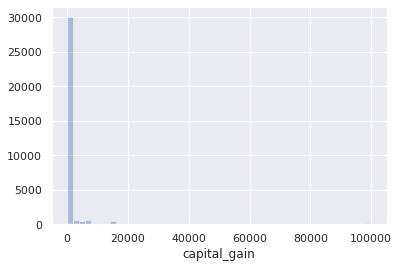

In [11]:
sns.distplot(df.capital_gain, kde=False)

#### > answer:
> almost everyone has $capital\_gains=0$

### 2. for people who have `capital_gain > 0` - plot the histogram for capital gains

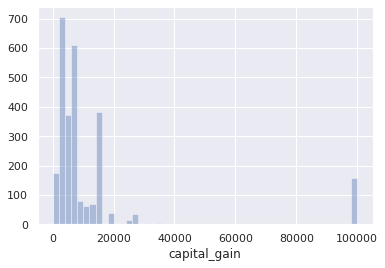

In [12]:
sns.distplot(df[df.capital_gain > 0].capital_gain, kde=False)

#### > remark:
> what's this weird bump at $100K ?

### 3. how many people have capital gains over 25000?
   - use `value_counts()` to look at all the values of capital_gain over 25000. 
   - what's weird about the data?

In [13]:
df[df.capital_gain > 25000].capital_gain.value_counts()

99999    159
27828     34
25236     11
34095      5
25124      4
41310      2
Name: capital_gain, dtype: int64

#### > answer:
> - the values seem oddly perscriptive... why do specific value repeat so much, and no values in between?
> - are the values here coding for something?
> - also 99999 is maybe a cap value of capital gains?


### 4. could the people who had capital_gain==25124 be related?

In [14]:
df[df.capital_gain == 25124]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,female,capital_gain,capital_loss,hours_per_week,native_country,over50k
1562,75,?,111177,Bachelors,13,Widowed,?,Not-in-family,White,1,25124,0,16,United-States,1
18847,73,Private,183213,Assoc-voc,11,Widowed,Prof-specialty,Not-in-family,White,0,25124,0,60,United-States,1
21892,65,?,224472,Prof-school,15,Never-married,?,Not-in-family,White,0,25124,0,80,United-States,1
22462,68,Self-emp-inc,52052,Assoc-voc,11,Widowed,Sales,Not-in-family,White,1,25124,0,50,United-States,1


#### > answer:

- very unlikely, 3 widows and 1 never-married are unlikely to share one household. 
- their "shared" capital_gain either codes for something, or is some kind of quantized property of a calculated field, or other fluke

### 5. does capital_gain over 50k mean income is over 50k?

In [15]:
df[df.capital_gain > 50000].over50k.mean()

1.0

#### > answer:
- 100% of people who had capital_gain>50000 had income over 50k
- so inspite of the weirdness we saw in the values, we can probably keep and interpret this variable as intended

### capital_loss
1. plot the histogram of capital_loss

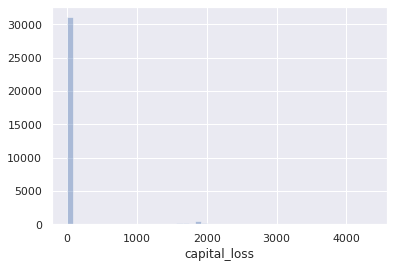

In [16]:
sns.distplot(df.capital_loss, kde=False)

#### > remark
> again we see almost everybody having 0 capital losses

### 2. for people who have `capital_loss > 0` 
   - plot the histogram for capital_loss

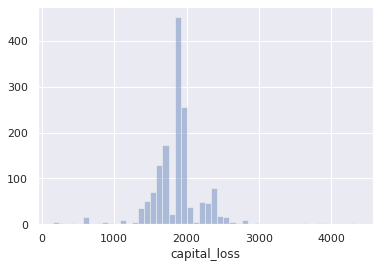

In [17]:
sns.distplot(df[df.capital_loss !=0].capital_loss, kde=False)

### 3. how many people had both capital_gain>0 and capital_loss>0 ?

In [18]:
len(df[(df.capital_gain > 0) & (df.capital_loss >0)])

0

### 4. who can afford to lose money on capital investments?
- what percent of people overall had over 50K income?
- what percent of people with 0 capital_loss? with capital_loss>0?

In [19]:
print("proportion of people who earn over 50K:\n{}".format(df.over50k.mean()))
print()
print("proportion of people who earn over 50K, by capital_loss > 0:")
print(df.groupby(df.capital_loss >0).over50k.mean())

proportion of people who earn over 50K:
0.2408095574460244

proportion of people who earn over 50K, by capital_loss > 0:
capital_loss
False    0.227692
True     0.508887
Name: over50k, dtype: float64


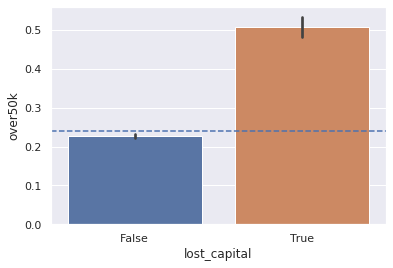

In [20]:
sns.barplot(x="lost_capital", y="over50k", data=df.assign(lost_capital=df.capital_loss >0))
plt.axhline(y=df.over50k.mean(), linestyle="--")

#### > answer:
- having capital_loss > 0 is correlated with earning more than 50K.
- in fact, the proportion of over50k **is twice as large** in capital losers than in the general population

### combining and binning
1. create a new capital_change column that equals capital_gain - capital_loss

In [21]:
df = df.assign(capital_change=df.capital_gain - df.capital_loss)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,female,capital_gain,capital_loss,hours_per_week,native_country,over50k,capital_change
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,0


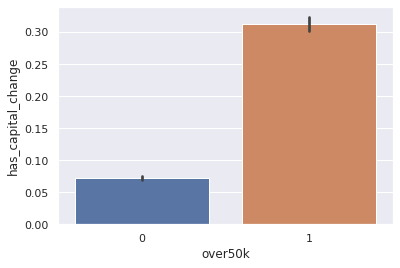

In [22]:
sns.barplot(
    y="has_capital_change", 
    x="over50k", 
    data=df.assign(has_capital_change=df.capital_change.abs() > 0)
    )

### 2. use the qcut function to quantize/bin/cut capital_change into a new columns called capital_change_bin with 10 bins of equal proportions.
   1. do not bin capital_change==0 values as there are too many of them
   1. to simplify using this column later, use the left side of the interval created as the label
   1. label rows with capital_change==0 as having capital_change_bin=0
   1. make sure you have no null values for capital_change_bin

In [23]:
# do not bin capital_change==-0
capital_change_bins = pd.qcut(df[df.capital_change !=0].capital_change, 10) 

# use left side of interval as label
capital_change_bins = capital_change_bins.apply(lambda interval: interval.left) 

# add capital_change_bin to df
df['capital_change_bin'] = capital_change_bins

# look at the last 4 columns
df.iloc[:, -4:].head()

,native_country,over50k,capital_change,capital_change_bin
0,United-States,0,2174,-1594.0
1,United-States,0,0,NaN
2,United-States,0,0,NaN
3,United-States,0,0,NaN
4,Cuba,0,0,NaN


In [24]:
# label rows with capital_change==0 as having capital_change_bin=0
df.replace({'capital_change_bin' : {np.nan : 0}}, inplace=True)

# look at the last 4 columns
df.iloc[:, -4:].head()

,native_country,over50k,capital_change,capital_change_bin
0,United-States,0,2174,-1594
1,United-States,0,0,0
2,United-States,0,0,0
3,United-States,0,0,0
4,Cuba,0,0,0


In [25]:
# make sure you have no null values for capital_change_bin
df.capital_change_bin.isnull().sum()

0

### 3. how many people have a non-zero capital_change?
- lets call this 'has_capital_change'
- plot 'has_capital_change' over 'over50k'
- what do you learn from this diagram?

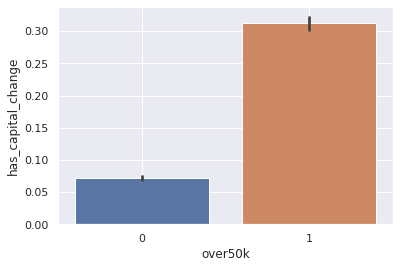

In [26]:
sns.barplot(
    y="has_capital_change", 
    x="over50k", 
    data=df.assign(has_capital_change=df.capital_change.abs() > 0)
    )
plt.grid(True)

#### > answer:
> - for people earning less than 50K, only ~7.5% try to have "money work for them" in terms of capital gain/loss
> - for people earning above 50K, over 30% have non-zero capital change

### 4. plot `capital_change` by `over50k`
- what do you learn from this diagram

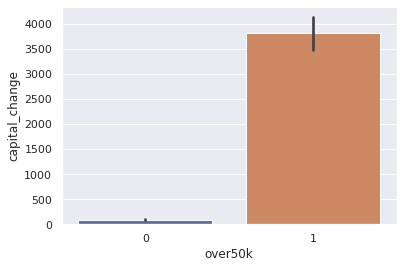

In [27]:
sns.barplot(x='over50k', y='capital_change', data=df)

#### > answer:
> - people earning over50k had the means/knowledge/opportunity to invest in capital, and earned a mean ~3500$ from capital

### 5. plot `over50k` by `capital_change_bin`
- what can you learn from this diagram?

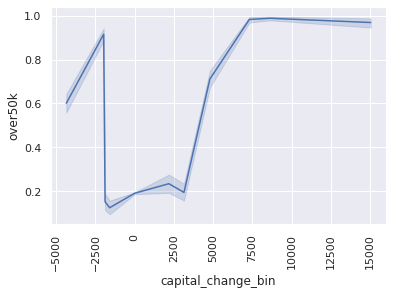

In [28]:
bars = sns.lineplot(x='capital_change_bin', y='over50k', data=df)
plt.setp(bars.get_xticklabels(), rotation=90);

#### > answer:
> - among people that has lost/earned roughly 2500\$ or under in capital_change, there is very minor difference in proportion of over50K earnings relative to the general population
> - however, among those that have earned or lost in excess of ~2500\$ there is a sharp increase in the proportion of over50K earners 

### education
1. what is the mean education_num by education?
    - sort the education categories by the mean_values. does it make sense?
    - check out other descriptive statistics to see if anything falls out of place
    - turn education into a categorical ordered type
    - plot education VS education_num
    - what have we learned?

In [29]:
# - what is the mean education_num by education?
# - sort the education categories by the mean_values. does it make sense?
df.groupby('education').education_num.mean().sort_values()

education
Preschool        1
1st-4th          2
5th-6th          3
7th-8th          4
9th              5
10th             6
11th             7
12th             8
HS-grad          9
Some-college    10
Assoc-voc       11
Assoc-acdm      12
Bachelors       13
Masters         14
Prof-school     15
Doctorate       16
Name: education_num, dtype: int64

#### > answer:
> yes, makes sense. looks like `education_num` is a numerical encoding for `education`

In [30]:
# - check out other descriptive statistics to see if anything falls out of place
df.groupby('education').education_num.describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
11th,1175.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
12th,433.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
1st-4th,168.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
5th-6th,333.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
7th-8th,646.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
9th,514.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Assoc-acdm,1067.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0
Assoc-voc,1382.0,11.0,0.0,11.0,11.0,11.0,11.0,11.0


#### > answer
> - yes, we see that std is 0 and min=max. 
> - that means there are no deviations or wrong encodings in the data.
> yippee!

['Preschool' '1st-4th' '5th-6th' '7th-8th' '9th' '10th' '11th' '12th'
 'HS-grad' 'Some-college' 'Assoc-voc' 'Assoc-acdm' 'Bachelors' 'Masters'
 'Prof-school' 'Doctorate']


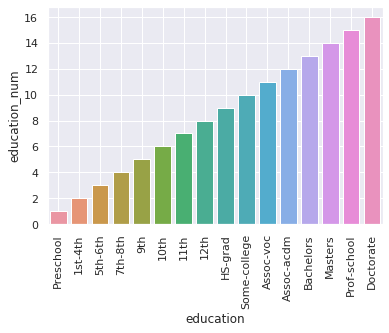

In [31]:
#   - turn education into a categorical ordered type
sorted_education = df.groupby('education').education_num.mean().sort_values().index.values
print(sorted_education)
df.education = df.education.astype(pd.CategoricalDtype(sorted_education, ordered=True))

#   - plot education VS education_num
bars = sns.barplot(x='education', y='education_num', data=df)
plt.setp(bars.get_xticklabels(), rotation=90);
plt.grid(True)

#   - what have we learned?

#### > answer:
we can now interchangably use either `education_num` or `education` in our graphs,
depending if we want to emphasize the categorical name of the education or numerical size

### 2. plot the distribution for education

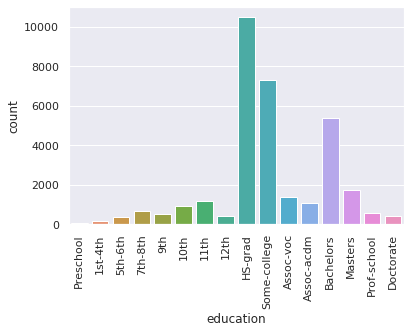

In [32]:
bars = sns.countplot(df.education)
plt.setp(bars.get_xticklabels(), rotation=90);

### 3. plot over50k by education
- what do we learn?

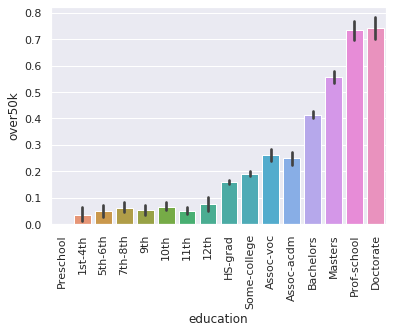

In [33]:
bars = sns.barplot(y='over50k', x='education', data=df)
plt.setp(bars.get_xticklabels(), rotation=90);

#### > answer:
> - over50k seems to be stringly correlated with education, 
> - with significant improvements to outcomes at High School, Bachelors, Masters and Proffesional/Doctorate attainment levels

### 4. plot hours_per_week by education
1. what can we learn?
2. now use the hue="over50k" of seaborn to see hours_per_week by education/over50k.
   - learn anything else?

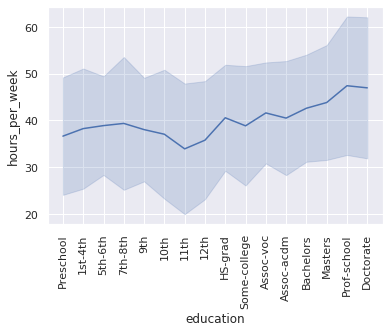

In [34]:
bars = sns.lineplot(y='hours_per_week', x='education', ci="sd", data=df)
plt.setp(bars.get_xticklabels(), rotation=90);

#### > answer:
> - we observe High-School gradues to have roughly a 40-hour work week
> - with education above highschool, we see a strong trend for more hours-per-week as education increases, above and beyond 40 hours
> - we see a sharp decline in work hours for highschool dropouts (9th-12th grade education). perhaps indicative of physical/mental health issues or life circumstances that make work difficult.
> - for education up until 8th grade we see a positive trend that more education allows for more work, reaching almost 40 hour weeks of full employment

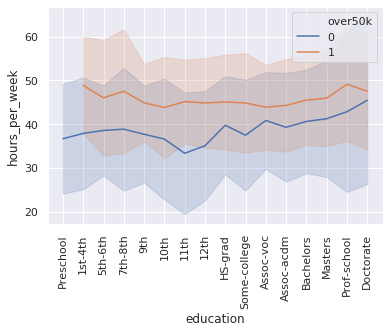

In [35]:
bars = sns.lineplot(y='hours_per_week', x='education', hue='over50k', ci="sd", data=df)
plt.setp(bars.get_xticklabels(), rotation=90);

#### > answer:
> - those that earn above 50K work approx 45 hours per week across most education levels. 
    with exceptions being at low education levels (where sample sizes are small so confidence intervals are large) 
    and for "Prof-School" education (doctors?), where the mean is closer to ~50 hour weeks.
> - those that earn under 50K work less hours across almost all education levels, mostly around 40 hour weeks at above high-school level education (except perhaps those with Doctorates where sample sizes are small) 

#### > note for later:
> look further at relationship between hours worked and over50k

### 5. plot education_num by occupation
- sort by mean education_num

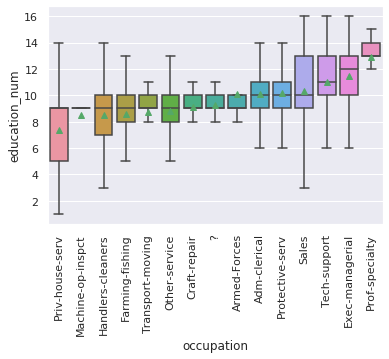

In [36]:
occupation_by_education = df.groupby("occupation").education_num.mean().sort_values().index.values
bars = sns.boxplot(
    x="occupation", 
    y='education_num', 
    order=occupation_by_education, 
    data=df,
    # medianprops={"color":"white"},
    showfliers=False, 
    showmeans=True
    )
_ = plt.setp(bars.get_xticklabels(), rotation=90)

#### > remark:
> clearly there seems like 5 cluster of jobs by education level:
> 1. "Priv-house-serv" (servants)
> 2. "Machine-op-inspect" to "Arned forced" (blue collar)
> 3. "Adm-clerical" to "sales" (white collar)
> 4. "Tech-support" - "Exec-managerial" (tech / management)
> 5. "Prof-specialty" (doctors/lawyers/proffesionals)


### 6. plot education_num by workclass
- sort by mean education_num

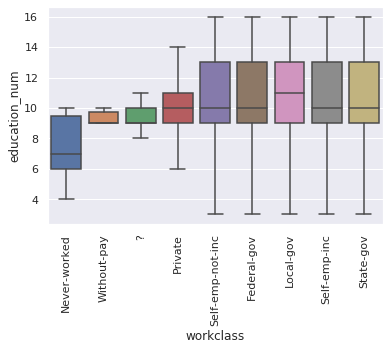

In [37]:
workclass_by_education = df.groupby("workclass").education_num.mean().sort_values().index.values
bars = sns.boxplot(x="workclass", y='education_num', order=workclass_by_education,  showfliers=False, data=df)
_ = plt.setp(bars.get_xticklabels(), rotation=90)

### 7. create a crosstab or a pivot_table of education VS occupation.
   - normalize it by the education rows 
     (each row X shows the conditional probability of having occupation Y by education level X) 
   - create a heatmap that shows which occpupations are most likely for each education level
   - verbally describe what you've learned

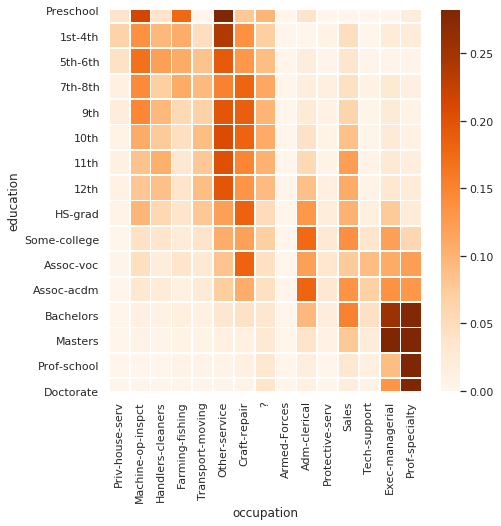

In [38]:
occ_by_edu_df = pd.crosstab(
    df.education, 
    df.occupation.astype(pd.CategoricalDtype(occupation_by_education, ordered=True)), 
    normalize='index')

fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(
    occ_by_edu_df
    , robust = True
    , ax=ax
    , cmap="Oranges"
    , linewidths=.75
);


#### > answer:
the heatmap shows for each education/row, which occupations are most likely to be taken by individuals with that education attainment.

> - for the very lower end of education, "machine-op-inspect" or "farming-fishing" is likely
> - Those with high-school or below attainment, are likely to find themselves in the large "Other-service", "Craft-repair" or "transport-moving" occupations, since these are large overall.
> - mid-level education "some-college" to "assoc-acdm" find a wide range of horizontal occuptions
> - for Bachelor and above education "Exec-managerial" and "Prof-specialty" are highly likely

### 8.  create a crosstab or a pivot_table of education VS workclass.
   - normalize it by the education rows 
     (each row X shows the conditional probability of having workclass Y by education level X) 
   - create a heatmap that shows which workclass is most likely for each education level
   - verbally describe what you've learned
   - re-run this analysis without the private sector
   

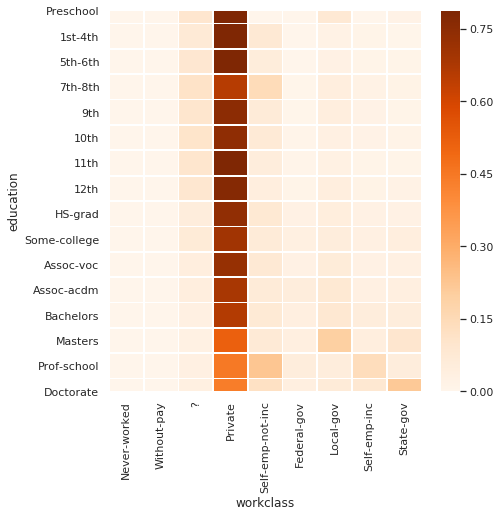

In [39]:
class_by_edu_df = pd.crosstab(
    df.education, 
    df.workclass.astype(pd.CategoricalDtype(workclass_by_education, ordered=True)), 
    normalize='index')

fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(
    class_by_edu_df
    , robust = True
    , ax=ax
    , cmap="Oranges"
    , linewidths=.75
);

#### > answer:
almost everyone, regardless of education, works in the private sector. yippee!

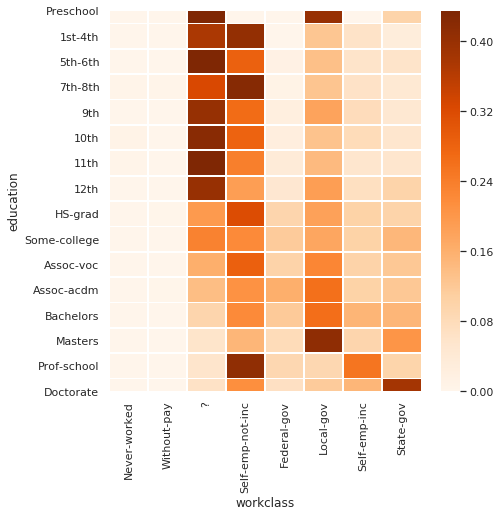

In [40]:
non_private_df = df[df.workclass != 'Private']

class_by_edu_df = pd.crosstab(
    non_private_df.education, 
    non_private_df.workclass.astype(pd.CategoricalDtype(workclass_by_education, ordered=True)), 
    normalize='index')

fig, ax = plt.subplots(figsize=(7,7))

sns.heatmap(
    class_by_edu_df
    , robust = True
    , ax=ax
    , cmap="Oranges"
    , linewidths=.75
);

#### > answer:
outside the private sector:
> - those with lowest education, mostly are unclassified by workclass, or are self-employed
> - high scool grads tend to be self-employed
> - mid-level education tend to be self-employed or local-government
> - people with masters degree tend to be employed by local goverment
> - people with prof-school tend to be self-employed
> - people with doctorates tend to be employed by state-government


### 9. plot "race" vs "education_num

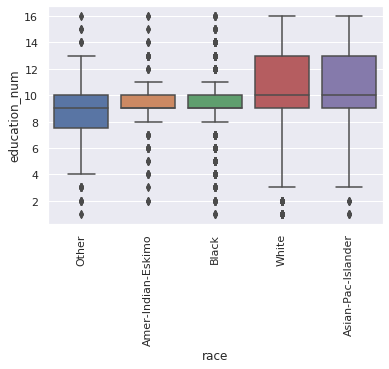

In [41]:
race_by_education = df.groupby('race').education_num.mean().sort_values().index.values
bars = sns.boxplot(x="race", y="education_num",  order=race_by_education, data=df)
_ = plt.setp(bars.get_xticklabels(), rotation=90)


### 10. plot "relationship" vs "education_num


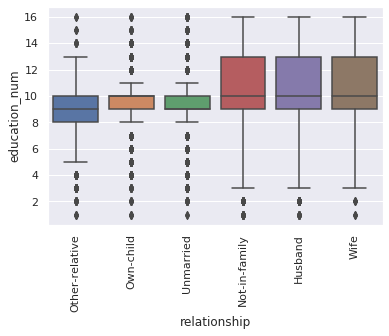

In [42]:
rel_by_education = df.groupby('relationship').education_num.mean().sort_values().index.values
bars = sns.boxplot(x="relationship", y="education_num",  order=rel_by_education, data=df)
_ = plt.setp(bars.get_xticklabels(), rotation=90)


## occupation / workclass
1. how many levels of occupation?

In [43]:
print(df.occupation.nunique())
print(df.occupation.unique())

15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


### 2. how many levels of worklass?

In [44]:
print(df.workclass.nunique())
print(df.workclass.unique())

9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


### 3. how many combinations? potential? actual?

In [45]:
print("potential:", df.workclass.nunique() * df.occupation.nunique())
print("actual:", len(df.groupby(['occupation', 'workclass'])))

potential: 135
actual: 83


### 4. plot over50k by occupation
- sort by mean over50k
- compare this to over50k by education. which variable more strongly predicts income?
- compare tjos to education_num by occupation. are the highest paying jobs correlated with highest earning education?

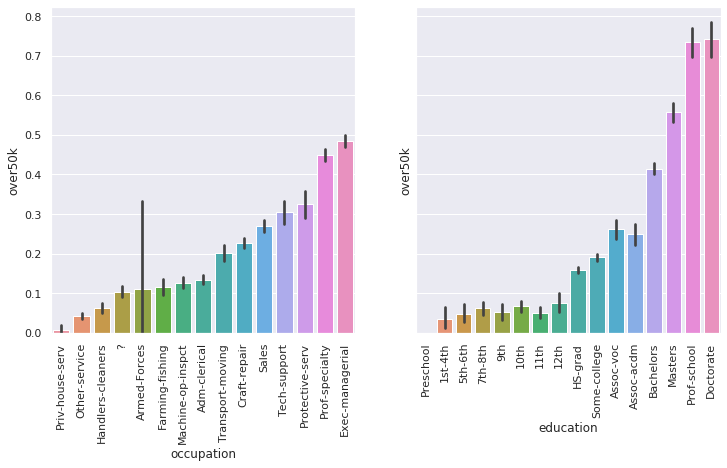

In [46]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
occ_by_50k = df.groupby('occupation').over50k.mean().sort_values().index.values
bars = sns.barplot(x='occupation', y='over50k', order=occ_by_50k, data=df, ax=axs[0])
plt.setp(bars.get_xticklabels(), rotation=90);

bars = sns.barplot(x='education', y='over50k', data=df, ax=axs[1])
plt.setp(bars.get_xticklabels(), rotation=90);

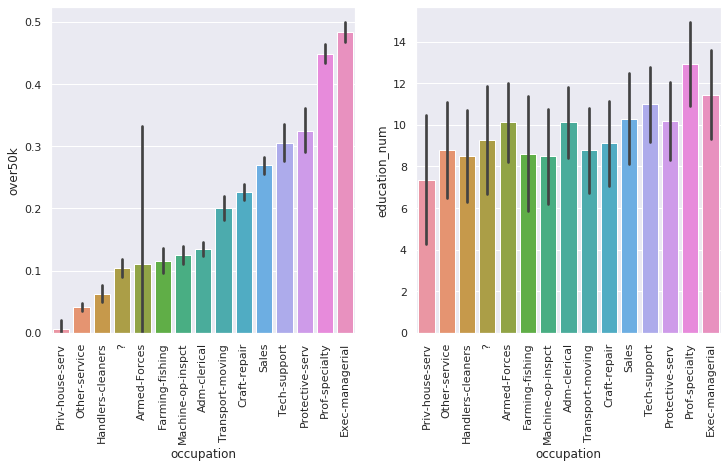

In [47]:
fig, axs = plt.subplots(ncols=2, sharex=True, figsize=(12,6))
bars = sns.barplot(x='occupation', y='over50k', order=occ_by_50k, data=df, ax=axs[0])
plt.setp(bars.get_xticklabels(), rotation=90);

bars = sns.barplot(x='occupation', y='education_num', ci="sd", order=occ_by_50k, data=df, ax=axs[1])
plt.setp(bars.get_xticklabels(), rotation=90);

#### > answer:
> - education looks like a stronger indicator of income, because disparities in income are higher when grouped by education than when grouped by occupation
> - the highest paying occupations are not the same as the occupations requiring highest education.
>   perhaps this is due to education needs varying wildly within occupations


### 5. plot `over50k` by `workclass`

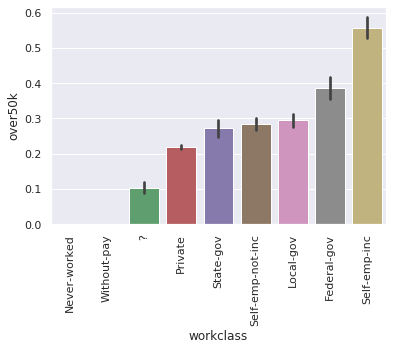

In [48]:
class_by_50k = df.groupby('workclass').over50k.mean().sort_values().index.values
bars = sns.barplot(x='workclass', y='over50k', order=class_by_50k, data=df)
plt.setp(bars.get_xticklabels(), rotation=90);

### 6. look at combinations of occupation / workclass
   1. what are the top combinations in terms of earning over50k? how many people in that category?

In [49]:
occupation_class = df.groupby(['occupation', 'workclass']) \
    .over50k.agg(["mean", "count"]) \
    .sort_values(by="mean", ascending=False)

occupation_class.head(10)

,,mean,count
occupation,workclass,,
Prof-specialty,Self-emp-inc,0.756250,160
Tech-support,Self-emp-inc,0.666667,3
Exec-managerial,Self-emp-inc,0.635000,400
Prof-specialty,Self-emp-not-inc,0.563003,373
Sales,Self-emp-inc,0.549828,291
Prof-specialty,Federal-gov,0.542857,175
Exec-managerial,Federal-gov,0.511111,180
Protective-serv,Federal-gov,0.500000,28
Exec-managerial,Private,0.481234,2691


### 2. how many of these combinations have more than 100 people?

In [50]:
occupation_class = occupation_class[occupation_class['count'] > 100]
print(len(occupation_class))
occupation_class.head(10)

40


mean  count
occupation      workclass                        
Prof-specialty  Self-emp-inc      0.756250    160
Exec-managerial Self-emp-inc      0.635000    400
Prof-specialty  Self-emp-not-inc  0.563003    373
Sales           Self-emp-inc      0.549828    291
Prof-specialty  Federal-gov       0.542857    175
Exec-managerial Federal-gov       0.511111    180
                Private           0.481234   2691
                Local-gov         0.476636    214
Protective-serv Local-gov         0.444079    304
Prof-specialty  Private           0.435798   2313

### 3. show a heatmap
of the mean over50k of occupation-vs-worklass for combinations with more than 100 people. center the heatmap at the populations mean over50k for increased effect. what conclusions can you draw?

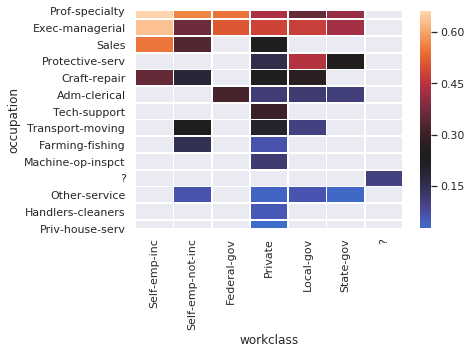

In [51]:
sns.heatmap(
    occupation_class['mean'].unstack(1)
    , center=df.over50k.mean()
    , robust = True
    , linewidths=.75)

#### > answer:
> 1. Prof-speciality and Exec managerial lead the earners across all work classes.
> 2. Self-employed-inc (having your own firm incorporated) is great
> 3. the private sector often has worse over50k mean than other sectors for the same occupations
> 4. Protective-serv (police/firemen) working for local-gov is a sweet deal


### 7. create a numerical encoding for occupation / workclass pairs
   - create a new column called "occ_class" that combines the string of the occupation and workclass
   - use the library [category_encoders](http://contrib.scikit-learn.org/categorical-encoding/), here's an [intro](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159) how to do it
   - use the weight of evidence encoder `ce.woe.WOEEncoder` here's an [article](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02#targetText=Weight%20of%20Evidence%20Encoding,-Weight%20of%20Evidence&targetText=Weight%20of%20evidence%20(WOE)%20is%20a%20measure%20of%20how%20much,P(Bads)%20%3D%201.) explaining it
   - add the encoded occ_class as a new column called `occ_class_woe` to your dataframe
      

In [53]:
!pip install category_encoders

     |████████████████████████████████| 102kB 5.5MB/s 


In [54]:
# pip install category_encoders
import category_encoders as ce

def get_occupation_workclass(person):
    occupation, workclass = person['occupation'], person['workclass']
    if (occupation, workclass) in occupation_class.index:
        return f"{occupation}|{workclass}"
    else:
        return "other"

df['occ_class'] = df.apply(get_occupation_workclass, axis=1)
ce_target = ce.woe.WOEEncoder(cols = ['occ_class'])
ce_target.fit(df["occ_class"], df['over50k'])
df["occ_class_woe" ] = ce_target.transform(df["occ_class"], df['over50k'])

# show the encoding
df.groupby("occ_class")['occ_class_woe'].max().sort_values()

occ_class
Priv-house-serv|Private             -3.162727
Other-service|Private               -2.115720
Other-service|State-gov             -2.038281
Handlers-cleaners|Private           -1.638773
Other-service|Local-gov             -1.490985
Farming-fishing|Private             -1.472380
Other-service|Self-emp-not-inc      -1.386845
?|?                                 -1.000536
Adm-clerical|State-gov              -0.944673
Transport-moving|Local-gov          -0.931369
Adm-clerical|Private                -0.906609
Machine-op-inspct|Private           -0.863285
Adm-clerical|Local-gov              -0.851020
Farming-fishing|Self-emp-not-inc    -0.582902
Protective-serv|Private             -0.499345
Craft-repair|Self-emp-not-inc       -0.367513
Transport-moving|Private            -0.231336
Craft-repair|Private                -0.083898
Sales|Private                       -0.045187
Transport-moving|Self-emp-not-inc    0.005975
Protective-serv|State-gov            0.071933
other                   

## correlations
1. which features are most important, which correlate?
    - compute the correction matrix of features with themselves

    

In [55]:
corr = df.corr()
corr.head()

,age,fnlwgt,education_num,female,capital_gain,capital_loss,hours_per_week,over50k,capital_change,capital_change_bin,occ_class_woe
age,1.000000,-0.076646,0.036527,-0.088832,0.077674,0.057775,0.068756,0.234037,0.074284,0.099866,0.162277
fnlwgt,-0.076646,1.000000,-0.043195,-0.026858,0.000432,-0.010252,-0.018768,-0.009463,0.000988,0.000334,-0.026165
education_num,0.036527,-0.043195,1.000000,-0.012280,0.122630,0.079923,0.148123,0.335154,0.117891,0.131408,0.442328
female,-0.088832,-0.026858,-0.012280,1.000000,-0.048480,-0.045567,-0.229309,-0.215980,-0.045846,-0.055595,-0.157328
capital_gain,0.077674,0.000432,0.122630,-0.048480,1.000000,-0.031615,0.078409,0.223329,0.998521,0.731770,0.120792


### 2. draw a clustermap of this correlation
   - center the cluster at 0
   - annotate the plot with the correlation values

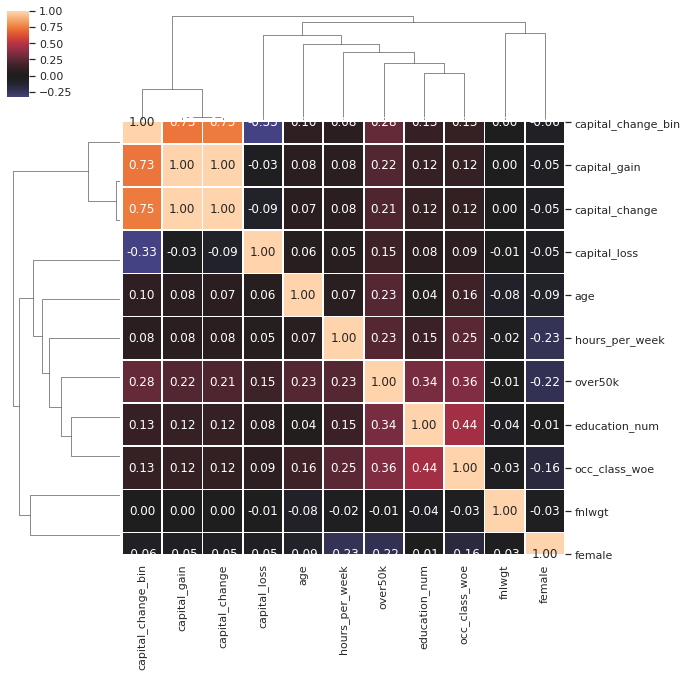

In [56]:
sns.clustermap(corr, 
               linewidths=.75,
               annot=True,
               fmt=".2f",
               center=0
               )

### 3. look at the strongest correlations and draw some conclusions.

#### > answer:
we obviously ignore the diagonal where variables have 100% correlation with themselves
> 1. a strong .44 correlation between `education_num` and `occ_class_woe` is especially interesting because we encoded occupation/class toward the `over50k` variable, but received a stronger correlation with education than with income (at a smaller .36). this shows that education is a super strong determinant of occupation/class, and that occupation/class determines income
> 2. at a slighly lower .34, `education_num` is still very strongly correlated with `over50k`, showing education is key for higher incomes
> 3. at .28 `capital_change_bin` is strongly correlated with `over50k`. it is my belief that here causality goes backwards - higher incomes create capital investments, rather than the opposite. perhpas an indication for that is that capital_change_bin is not strongly correlated with anything but `over50k`
> 4. at .25 `occ_class_woe` is strongly correlated with `hours_per_week`. stronger than the .15 correlation of `education_num` with `hours_per_week`, and we've seen analysis that with higher education people work more hours. it appears that higher education enables higher paying jobs, with require more hours.
> 5. at .23 `hours_per_week` is strongly correlated with `over50k`. this is probably explained by the previous item. better jobs require more hours, rather than the more obvious more hours worked creating higher salary. 
> 5. at -0.23 `hours_per_week` is strongly negatively correlated with being `female`. so women work less hours. this is only slightly more negative than the -0.22 correlation women have with `over50k`. are women earning less because they are not willing to work as many hours? there is no definitive answer here, but it is interesting to also note the -0.16 negative correlation of `occ_class_woe` with being female, so they might be choosing lower paying jobs with shorter hours. lastly, it is interesting to note the correlation of `female` and `education_num` is a negligble -0.01, that is women have the same levels of education as men. 
> 1. the strongest correlation is `capital_change_bin` and `capital_gain` but that is an artifact of how we built that variable.
